In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib as im
import sys

In [ ]:
sys.path.append('/Users/nikitakrutoy/Projects/ProcessMiningPWC/tools')

In [ ]:
im.reload(m)
import processmining.miners as m

In [ ]:
from processmining.preprocessing import Log, clean, prune

In [ ]:
data = pd.read_csv("../data/final(in_scope).csv", index_col=0)

In [ ]:
data["SYS DATE"][6376] = data["CREATION DATE"][6376]
data.sort_values("SYS DATE", inplace=True)

In [ ]:
data.to_csv("../data/final(in_scope).csv")

# Альфа Алгоритм

### Чтение лога

In [109]:
dirty_log = Log.from_csv("../data/final(in_scope).csv", do_sort=False)

INFO:root:Reading...


### Выделение самых встречаемых кейсов и чистка

In [110]:
log, paths, betas = prune(dirty_log, coef=0.12)

INFO:root:Pruning...


In [111]:
clean(log, inplace=True);

INFO:root:Cleaning...


### Построение модели

In [112]:
am = m.AlphaMiner()

In [113]:
am.apply(log)

DEBUG:root:Got task list
DEBUG:root:Got direct follows
DEBUG:root:Got causaieties
DEBUG:root:Got cycles
DEBUG:root:Got not causaieties
DEBUG:root:Got parallels
DEBUG:root:Got subsets
INFO:root:Processing 4094 subset of 12 events
DEBUG:root:Got Xl
DEBUG:root:Building Petri net


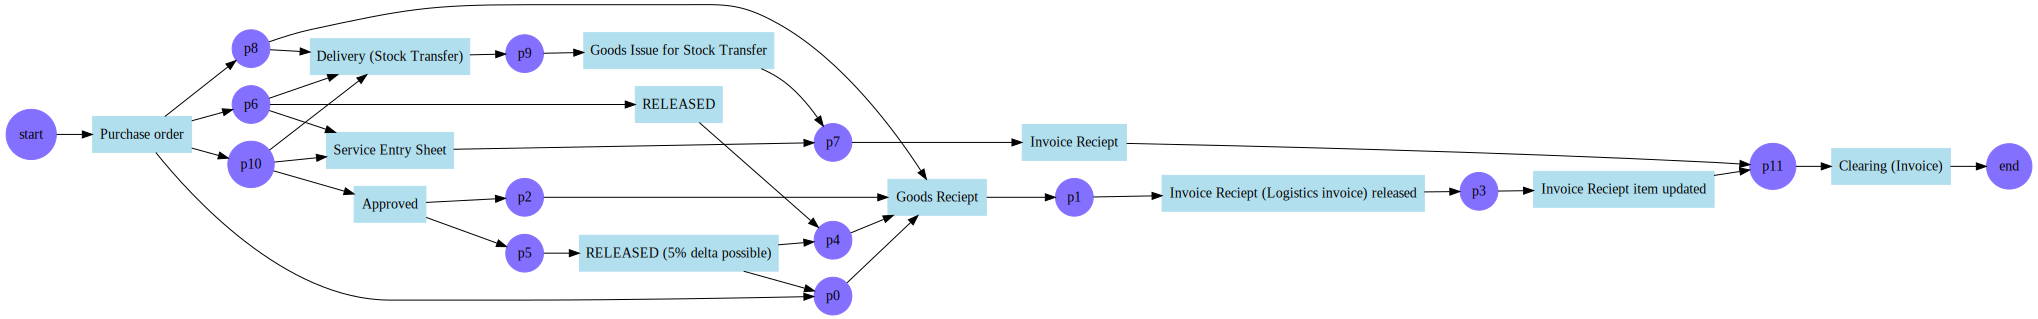

In [114]:
am.draw(output_file="test2")